# Boston Crime

In [46]:
#!pip3 install geopandas

In [47]:
#!pip3 install pandas_profiling

In [48]:
#!pip3 install folium

### Import

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import geopandas as gpd
import pandas_profiling
import folium

from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

### Read

In [50]:
path = "crime.csv"
df = pd.read_csv(path, encoding='latin-1')
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

### Report

In [51]:
df.profile_report()

In [52]:
print(df.isna().sum())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64


### EDA

In [265]:
df["Day"] = df["DAY_OF_WEEK"].map({'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4, 'Friday': 5,'Saturday': 6,'Sunday':7})



<function matplotlib.pyplot.show(*args, **kw)>

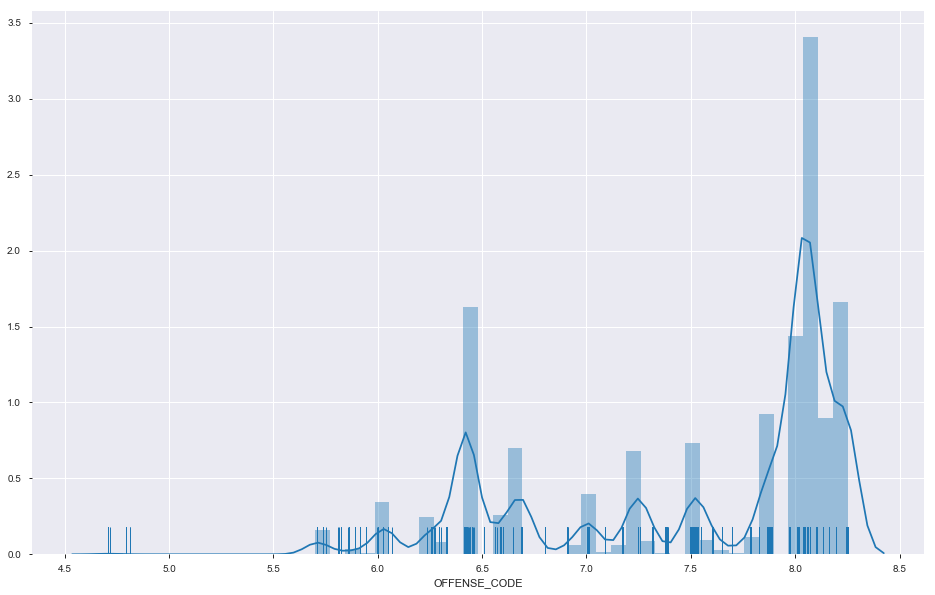

In [54]:
plt.figure(figsize=(16,10))
sns.distplot(np.log(df.OFFENSE_CODE), kde=True, rug=True)
plt.show

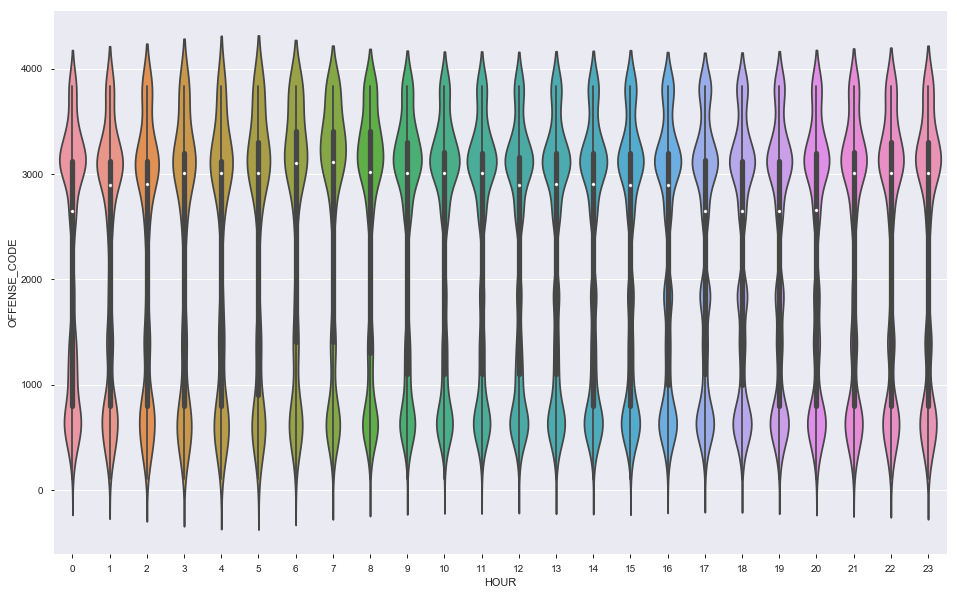

In [55]:
var_name = 'HOUR'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.violinplot(x=var_name, y="OFFENSE_CODE", data=df, order=col_order)

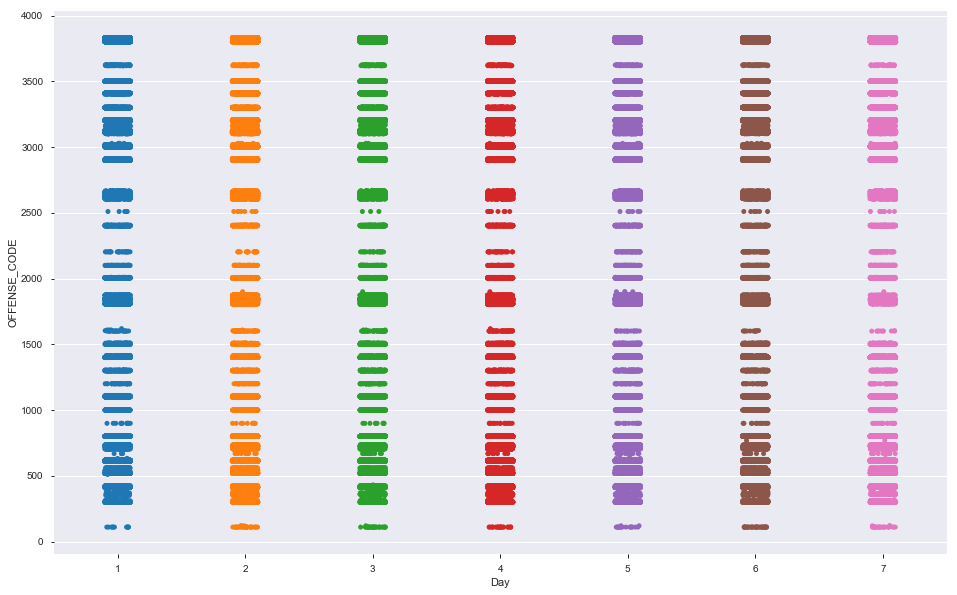

In [56]:
var_name = 'Day'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.stripplot(x=var_name, y="OFFENSE_CODE", data=df, order=col_order)

In [59]:
locs = list(zip(df.Lat.dropna(), df.Long.dropna()))


m = folium.Map(location=['42.3600825', '-71.0588801'])
for lat, lng in locs[:1000]:
    m.add_children(folium.Marker((lat, lng)))
m

In [194]:
locs = list(zip(df.Lat.dropna(), df.Long.dropna()))
print(type(locs))
heat_data = [[lat, long] for lat, long in locs[:30000]]
map_ = folium.Map(location=['42.3600825', '-71.0588801'], zoom_start=11)
hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_)
map_

<class 'list'>


In [58]:
df.loc[~pd.isna(df.SHOOTING), "SHOOTING"] = 1 
df.loc[pd.isna(df.SHOOTING), "SHOOTING"] = 0

In [209]:
data = list(zip([df[df.SHOOTING == 1][["Lat", "Long"]]]))
type(data)

list

In [272]:
data = df[df.SHOOTING == 1][["Lat", "Long"]].values

#locs = list(zip(df.Lat.dropna(), df.Long.dropna()))
heat_data = [[lat, long] for lat, long in data[:20]]
map_ = folium.Map(location=['42.3600825', '-71.0588801'], zoom_start=11)
hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_)
map_

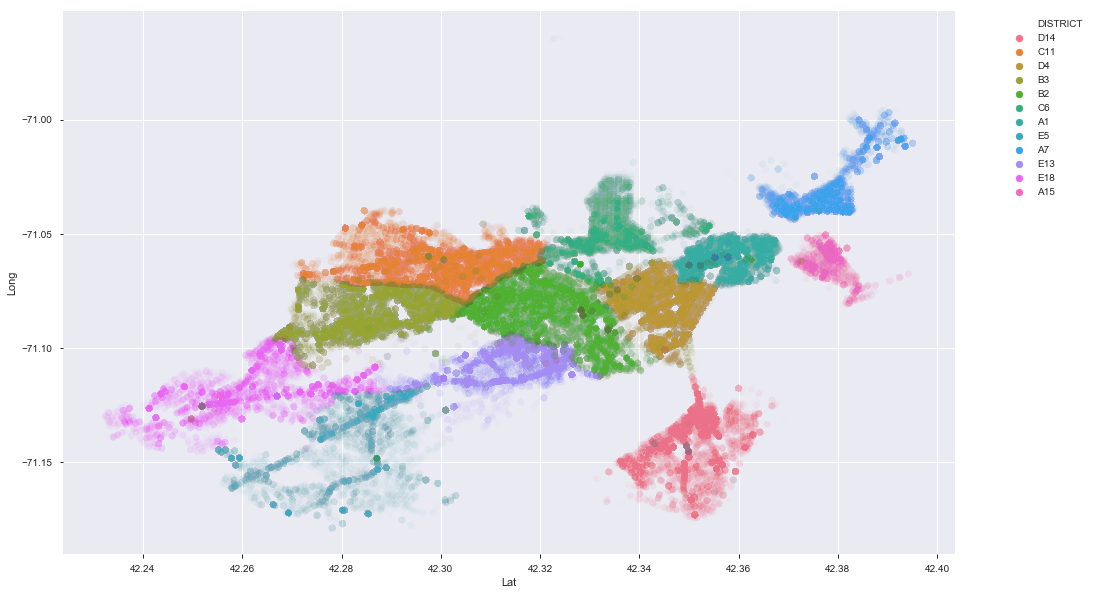

In [151]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='Lat', y='Long', hue='DISTRICT', alpha=0.01, data=df[df['Lat'] > 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

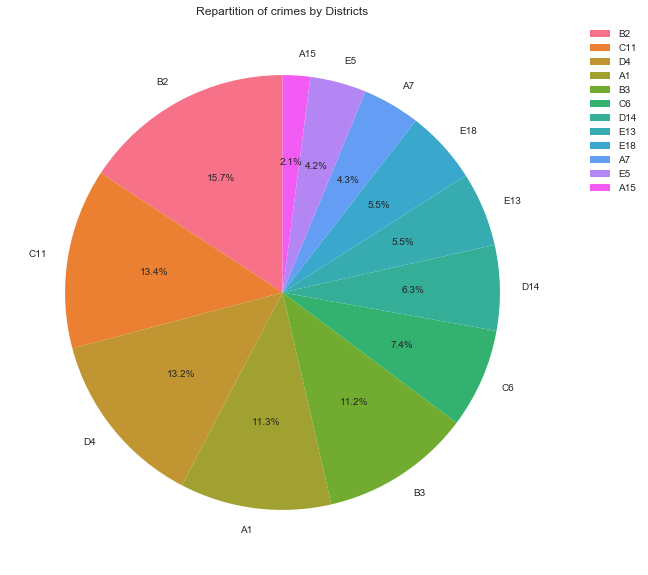

In [263]:
crime_per_district=df.DISTRICT.value_counts()

plt.figure(figsize=(10,10))
plt.pie(crime_per_district.values, labels=crime_per_district.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 13))
plt.title('Repartition of crimes by Districts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [258]:
df["OFFENSE_CODE_GROUP"].count()

319073

Text(0.5, 1.0, 'Number of crime per code')

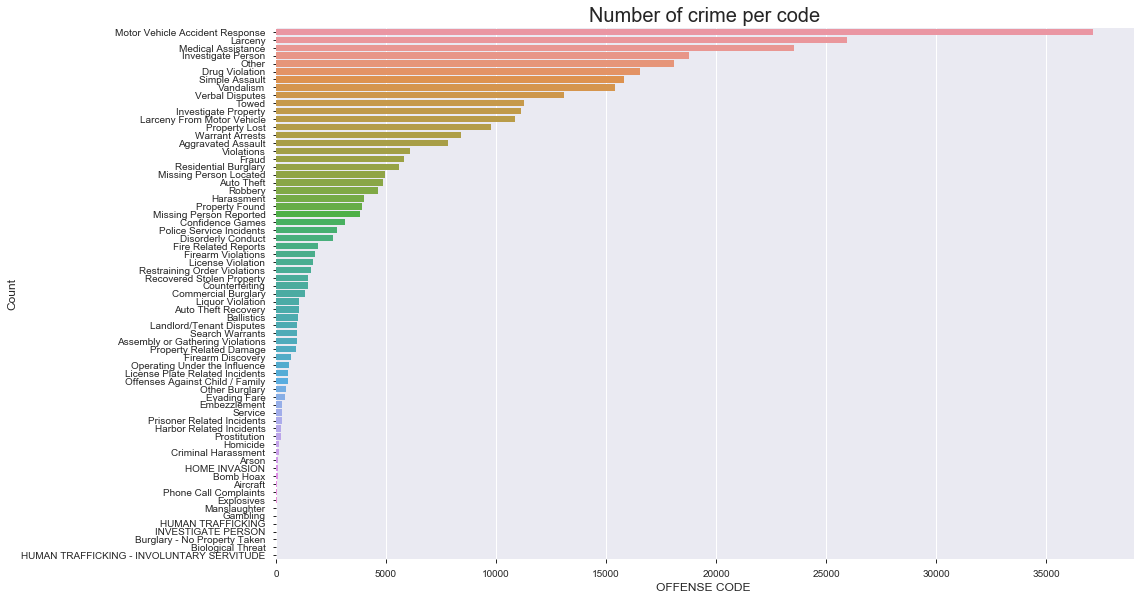

In [148]:
sns.catplot(y="OFFENSE_CODE_GROUP", kind='count', height=8, aspect=2, order=df.OFFENSE_CODE_GROUP.value_counts().index, data=df)
plt.xlabel('OFFENSE CODE ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of crime per code", fontsize=20)

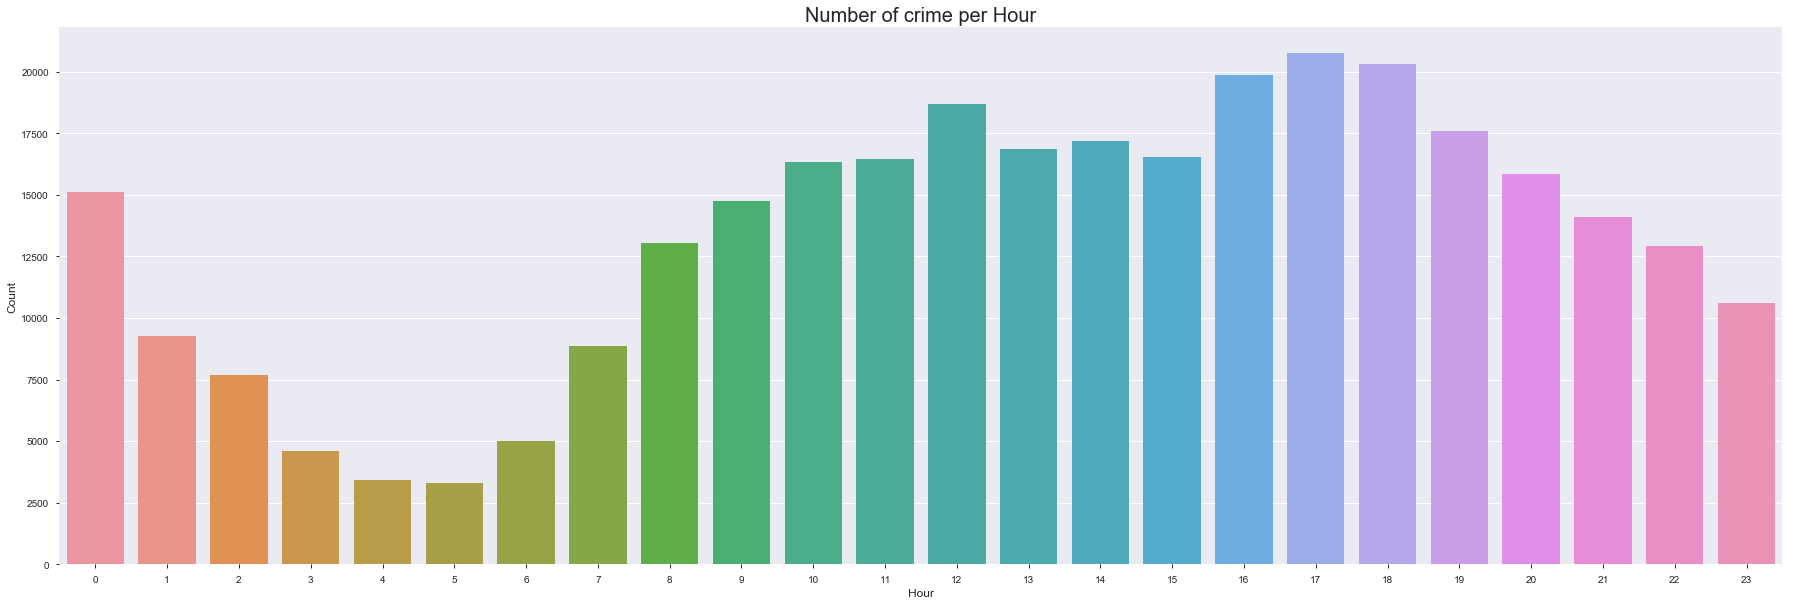

In [118]:
sns.catplot( x="HOUR", kind='count', height=8.27, aspect=3, data=df)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of crime per Hour", fontsize=20)
plt.show()

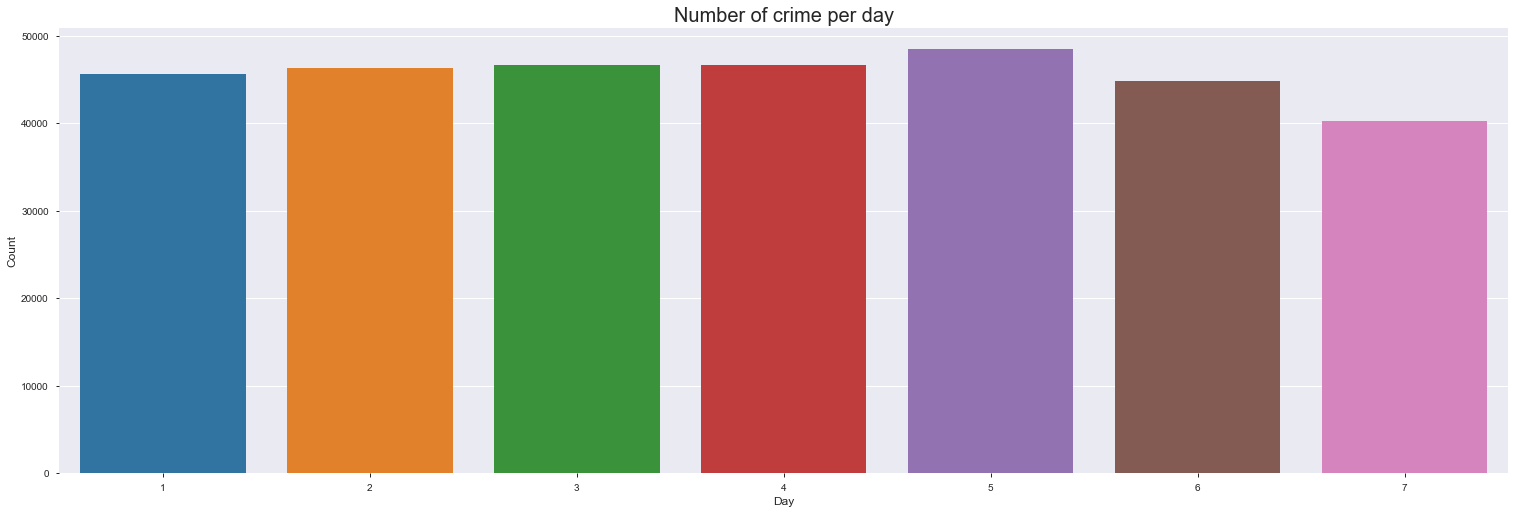

In [120]:
sns.catplot( x="Day", kind='count',height=7, aspect=3, data=df, order=col_order)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of crime per day", fontsize=20)
plt.show()

In [23]:
set(df.MONTH)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

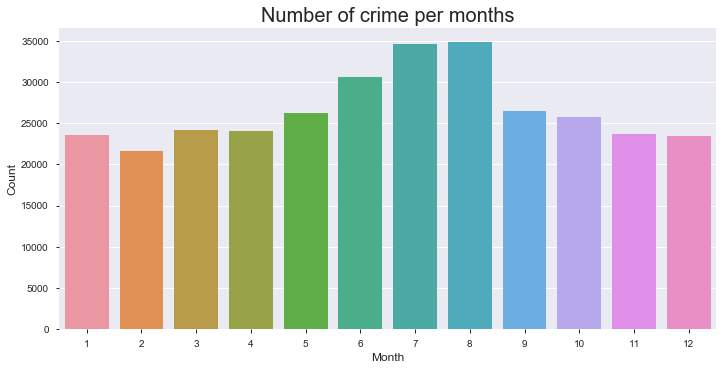

In [142]:
sns.catplot( x="MONTH", kind='count', data=df, aspect=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of crime per months", fontsize=20)
plt.show()

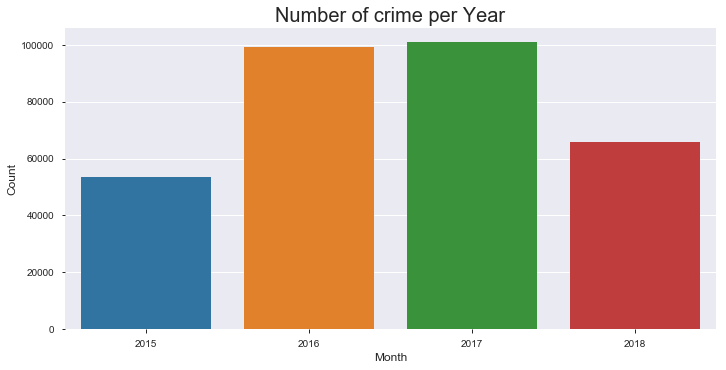

In [278]:
sns.catplot( x="YEAR", kind='count', data=df, aspect=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of crime per Year", fontsize=20)
plt.show()